In [1]:
#meta 5/14/2024 my PCA

#infra orig: Trainbox + VSCode 
#      env: tc2-venv created by Blake
#      confirmed Python 3.10.4
#      numpy 1.24.2, pandas 2.0.0
#      pip 23.2.1, ipykernel 6.22.0, ipython 8.12.0
#      Trainbox 3D vis libs:
#      $ pip install --proxy <value> plotly_express => plotly-5.18.0 plotly_express-0.4.1
#      $ pip install --upgrade --proxy <value> nbformat => nbformat 5.9.2

#infra this: myMBpro 
#      env: base
#      confirmed Python 3.10.13
#      numpy 1.24.3, pandas 2.1.4, scipy 1.10.0
#      pip 23.3.1, ipykernel 6.28.0, ipython 8.20.0
#      3D vis libs:
#      plotly-5.0.0 (no plotly_express)


#input: tiny data, generated data, Iris dataset  $config
#output: vis 1) 2D & 3D scatter plots

#history
#5/14/2024 myPCA
#      Stats with tiny data: standardization, z-scores, covariances
#      myPCA from scratch: Eigenvalues and Eigenvectors

#5/29/2024 myPCA
#      Moved to personal Gith
#      Added PracticalMath: Combinatorics for Iris CorrelationMatrix between all dims


#References
#
# https://www.askpython.com/python/examples/principal-component-analysis

#Linear algebra
# https://www.youtube.com/watch?v=fNk_zzaMoSs

#with Seaborn more flexible plots
# refer to https://seaborn.pydata.org/tutorial/axis_grids.html


In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
#add 3D vis
import plotly.express as px

# PCA
- a dimensionality reduction technique  
- an unsupervised statistical method

## 0. Stats w/ tiny data
- z-scores

In [3]:
#tiny data
x = [1,20,88]
y = [5,26,27]
z = [6,24,37]

data = np.array([x,y,z])
data

array([[ 1, 20, 88],
       [ 5, 26, 27],
       [ 6, 24, 37]])

In [4]:
#preview as df
df_data = pd.DataFrame(data, columns = ['x','y','z'])
df_data['c'] = ['r','g','b']
df_data['c'] = df_data['c'].astype('category')

print(df_data.info())
df_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   x       3 non-null      int64   
 1   y       3 non-null      int64   
 2   z       3 non-null      int64   
 3   c       3 non-null      category
dtypes: category(1), int64(3)
memory usage: 335.0 bytes
None


,x,y,z,c
0,1,20,88,r
1,5,26,27,g
2,6,24,37,b


In [5]:
#stats: zscores
data_zscores = stats.zscore(data) #, axis=1
data_zscores

array([[-1.38873015, -1.33630621,  1.39759994],
       [ 0.46291005,  1.06904497, -0.88597853],
       [ 0.9258201 ,  0.26726124, -0.51162141]])

In [6]:
#alt
from sklearn.preprocessing import StandardScaler 

# define standard scaler 
scaler = StandardScaler() 
  
# transform data 
data_scaled = scaler.fit_transform(data)

In [7]:
data[:,2]

array([88, 27, 37])

In [8]:
#stats: zscores confirm manually last feature
f_2 = data[:,2]
mu = np.mean(f_2)
squares = (f_2 - mu)**2
sigma = np.sqrt(sum(squares)/len(f_2))
zscores = (f_2 - mu) / sigma

zscores

array([ 1.39759994, -0.88597853, -0.51162141])

- ranges

In [9]:
#feature ranges 
data.min(axis = 0), data.max(axis = 0)
range = data.max(axis = 0) - data.min(axis = 0)
range

array([ 5,  6, 61])

In [10]:
range_zscores = data_zscores.max(axis = 0) - data_zscores.min(axis = 0)
range_zscores

array([2.31455025, 2.40535118, 2.28357847])

- Covariances

In [11]:
np.cov(data, rowvar = False), np.cov(data, rowvar = False, bias=True)

(array([[   7.        ,    7.        ,  -81.5       ],
        [   7.        ,    9.33333333,  -98.33333333],
        [ -81.5       ,  -98.33333333, 1070.33333333]]),
 array([[  4.66666667,   4.66666667, -54.33333333],
        [  4.66666667,   6.22222222, -65.55555556],
        [-54.33333333, -65.55555556, 713.55555556]]))

In [12]:
np.cov(data_zscores, rowvar = False), np.cov(data_zscores, rowvar = False, bias=True)

(array([[ 1.5       ,  1.29903811, -1.41234346],
        [ 1.29903811,  1.5       , -1.47575447],
        [-1.41234346, -1.47575447,  1.5       ]]),
 array([[ 1.        ,  0.8660254 , -0.9415623 ],
        [ 0.8660254 ,  1.        , -0.98383631],
        [-0.9415623 , -0.98383631,  1.        ]]))

### 0.1 Vis: 3D and 2D Reduced

- 3D

In [13]:
fig = px.scatter_3d(
    x=data[:,0], y=data[:,1], z=data[:,2], color=df_data['c'],
    title='3D: Tiny Data' #, width = 800, height=800
)
fig.show()

/Users/amigopro/opt/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:1958: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers


In [14]:
fig = px.scatter_3d(
    x=data_scaled[:,0], y=data_scaled[:,1], z=data_scaled[:,2], color=df_data['c'],
    title='3D: Tiny Data Scaled' #, width = 800, height=800
)
fig.show()

/Users/amigopro/opt/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



- Reduce to 2D

In [15]:
# Perform PCA for 2D visualization
PCA_model = PCA(n_components = 2)
PCA_model.fit(data)
data_2d = PCA_model.transform(data)

print("Shape: " + str(data_2d.shape))
print(data_2d)

Shape: (3, 2)
[[ 37.6012643   -0.18388074]
 [-23.8188149   -0.94142399]
 [-13.7824494    1.12530473]]


In [16]:
# Perform PCA for 2D visualization
PCA_model_scaled = PCA(n_components = 2)
PCA_model_scaled.fit(data_scaled)
data_2d_scaled = PCA_model.transform(data_scaled)

print("Shape: " + str(data_2d_scaled.shape))
print(data_2d_scaled)

Shape: (3, 2)
[[-46.26423098   7.54071542]
 [-48.89115455   7.81647401]
 [-48.48130566   8.63741172]]


In [17]:
# plt.scatter(x=data_2d[:,0], y=data_2d[:,1])
# plt.title('2D: Tiny Data');

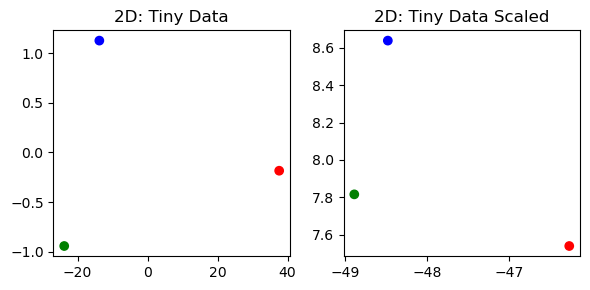

In [18]:
# using subplot function and creating plot one
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)  

# plot 1: row 1, column 2, count 1

plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=df_data['c'])
plt.title('2D: Tiny Data')
# plt.xlabel('x-axis')
# plt.ylabel('y-axis')
 
# using subplot function and creating plot 2: row 1, column 2, count 2
plt.subplot(1, 2, 2)
plt.scatter(x=data_2d_scaled[:,0], y=data_2d_scaled[:,1], c=df_data['c'])
plt.title('2D: Tiny Data Scaled')

# space between the plots
plt.tight_layout()
 
# show plot
plt.show()

## 1. myLearn: Principal Component Analysis from Scratch in Python
Refer to https://www.askpython.com/python/examples/principal-component-analysis

Principal Component analysis reduces high dimensional data to lower dimensions while capturing maximum variability of the dataset.  
Data visualization is the most common application of PCA. PCA is also used to make the training of an algorithm faster by reducing the number of dimensions of the data.

- start with 2 features

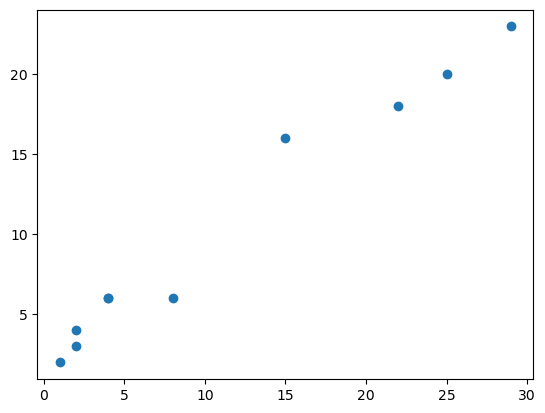

In [19]:
X1 = np.array([2,8,1,4,22,15,25,29,4,2])
X2 = np.array([3,6,2,6,18,16,20,23,6,4])

plt.figure()
plt.scatter( x = X1,y = X2 );

In [20]:
X = np.stack((X1, X2), axis = 0) 
print(X.shape)
X_meaned = X - np.mean(X , axis = 0)

X, X_meaned

(2, 10)


(array([[ 2,  8,  1,  4, 22, 15, 25, 29,  4,  2],
        [ 3,  6,  2,  6, 18, 16, 20, 23,  6,  4]]),
 array([[-0.5,  1. , -0.5, -1. ,  2. , -0.5,  2.5,  3. , -1. , -1. ],
        [ 0.5, -1. ,  0.5,  1. , -2. ,  0.5, -2.5, -3. ,  1. ,  1. ]]))

In [21]:
# calculating the covariance matrix of the mean-centered data.
cov_mat = np.cov(X_meaned , rowvar = False)
print(cov_mat.shape)
cov_mat

(10, 10)


array([[ 0.5, -1. ,  0.5,  1. , -2. ,  0.5, -2.5, -3. ,  1. ,  1. ],
       [-1. ,  2. , -1. , -2. ,  4. , -1. ,  5. ,  6. , -2. , -2. ],
       [ 0.5, -1. ,  0.5,  1. , -2. ,  0.5, -2.5, -3. ,  1. ,  1. ],
       [ 1. , -2. ,  1. ,  2. , -4. ,  1. , -5. , -6. ,  2. ,  2. ],
       [-2. ,  4. , -2. , -4. ,  8. , -2. , 10. , 12. , -4. , -4. ],
       [ 0.5, -1. ,  0.5,  1. , -2. ,  0.5, -2.5, -3. ,  1. ,  1. ],
       [-2.5,  5. , -2.5, -5. , 10. , -2.5, 12.5, 15. , -5. , -5. ],
       [-3. ,  6. , -3. , -6. , 12. , -3. , 15. , 18. , -6. , -6. ],
       [ 1. , -2. ,  1. ,  2. , -4. ,  1. , -5. , -6. ,  2. ,  2. ],
       [ 1. , -2. ,  1. ,  2. , -4. ,  1. , -5. , -6. ,  2. ,  2. ]])

In [22]:
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

print(eigen_values.shape, eigen_vectors.shape)
eigen_values, eigen_vectors

(10,) (10, 10)


(array([-5.67228102e-15, -3.16248814e-31, -4.78001015e-33,  3.13882211e-32,
         1.45578115e-18,  2.68764444e-17,  4.42346355e-16,  2.56286707e-15,
         7.14588610e-15,  4.80000000e+01]),
 array([[ 1.14225814e-02,  1.29726927e-16,  5.41019591e-17,
         -6.58511885e-17,  3.92367990e-03, -3.86321318e-03,
         -9.60830315e-03, -9.04923658e-02, -9.90525795e-01,
          1.02062073e-01],
        [-8.66328738e-01, -1.63636299e-15, -7.26418077e-16,
          9.35238847e-16, -5.25531935e-02,  5.39215062e-02,
          6.51107428e-03,  4.43740665e-01, -7.20438169e-02,
         -2.04124145e-01],
        [ 1.13448116e-03, -3.33278696e-01, -2.04705115e-01,
         -8.95302508e-01,  6.06374548e-02, -6.48393969e-02,
          1.52384224e-01,  6.26096275e-02,  3.82442197e-03,
          1.02062073e-01],
        [ 2.26896233e-03,  8.77497851e-01, -4.43369970e-02,
         -2.14973416e-01,  1.21274910e-01, -1.29678794e-01,
          3.04768448e-01,  1.25219255e-01,  7.64884393e-03,
   

In [23]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
 
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

print(sorted_eigenvectors.shape)
sorted_eigenvectors

(10, 10)


array([[ 1.02062073e-01, -9.90525795e-01, -9.04923658e-02,
        -9.60830315e-03, -3.86321318e-03,  3.92367990e-03,
        -6.58511885e-17,  5.41019591e-17,  1.29726927e-16,
         1.14225814e-02],
       [-2.04124145e-01, -7.20438169e-02,  4.43740665e-01,
         6.51107428e-03,  5.39215062e-02, -5.25531935e-02,
         9.35238847e-16, -7.26418077e-16, -1.63636299e-15,
        -8.66328738e-01],
       [ 1.02062073e-01,  3.82442197e-03,  6.26096275e-02,
         1.52384224e-01, -6.48393969e-02,  6.06374548e-02,
        -8.95302508e-01, -2.04705115e-01, -3.33278696e-01,
         1.13448116e-03],
       [ 2.04124145e-01,  7.64884393e-03,  1.25219255e-01,
         3.04768448e-01, -1.29678794e-01,  1.21274910e-01,
        -2.14973416e-01, -4.43369970e-02,  8.77497851e-01,
         2.26896233e-03],
       [-4.08248290e-01, -1.52976879e-02, -2.50438510e-01,
        -6.09536896e-01,  2.59357588e-01, -2.42549819e-01,
        -2.58185745e-01, -3.05557585e-01,  3.35711120e-01,
        -4.

In [24]:
# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
 
n_components = 1 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

print(eigenvector_subset.shape)
eigenvector_subset


(10, 1)


array([[ 0.10206207],
       [-0.20412415],
       [ 0.10206207],
       [ 0.20412415],
       [-0.40824829],
       [ 0.10206207],
       [-0.51031036],
       [-0.61237244],
       [ 0.20412415],
       [ 0.20412415]])

The larger the principal component axis the larger the variability in data it represents.

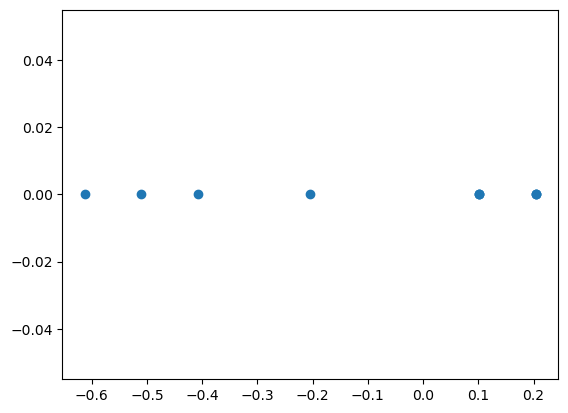

In [25]:
plt.figure()
plt.scatter( x = eigenvector_subset[:,0],y = np.array([0,0,0,0,0,0,0,0,0,0]));

## 1.1 Stats with generated data
- beyond 2 features  
- generate data

In [26]:
#Generate a dummy dataset: Data generated have dimensions (20,5) i.e. 20 examples and 5 variables for each example. 
# calculated the mean of each variable (columnn) and subtracted that from every row of the respective column.
# helpful when calculating the covariance matrix
X = np.random.randint(10,50,100).reshape(20,5) 
# mean Centering the data  
X_meaned = X - np.mean(X , axis = 0)

print(X.shape, X_meaned.shape)
X, X_meaned

(20, 5) (20, 5)


(array([[17, 26, 46, 30, 41],
        [29, 21, 46, 49, 26],
        [49, 31, 43, 14, 49],
        [45, 25, 41, 22, 23],
        [35, 18, 39, 11, 42],
        [20, 33, 33, 27, 22],
        [37, 35, 41, 10, 16],
        [16, 22, 26, 31, 49],
        [41, 41, 27, 38, 23],
        [38, 40, 25, 45, 42],
        [38, 21, 41, 21, 44],
        [38, 37, 42, 19, 20],
        [35, 24, 29, 44, 49],
        [20, 36, 48, 34, 32],
        [16, 20, 46, 49, 16],
        [33, 40, 42, 27, 19],
        [45, 42, 46, 12, 40],
        [46, 12, 22, 37, 10],
        [28, 41, 44, 44, 33],
        [42, 32, 15, 28, 47]]),
 array([[-16.4 ,  -3.85,   8.9 ,   0.4 ,   8.85],
        [ -4.4 ,  -8.85,   8.9 ,  19.4 ,  -6.15],
        [ 15.6 ,   1.15,   5.9 , -15.6 ,  16.85],
        [ 11.6 ,  -4.85,   3.9 ,  -7.6 ,  -9.15],
        [  1.6 , -11.85,   1.9 , -18.6 ,   9.85],
        [-13.4 ,   3.15,  -4.1 ,  -2.6 , -10.15],
        [  3.6 ,   5.15,   3.9 , -19.6 , -16.15],
        [-17.4 ,  -7.85, -11.1 ,   1.4 ,  16.85]

- validate numpy functions vs my manual

In [27]:
#validate
X_meaned.max(axis=0) - X_meaned.min(axis=0), X.max(axis=0) - X.min(axis=0), X.var(axis=0), X_meaned.var(axis=0)

(array([33., 30., 33., 39., 39.]),
 array([33, 30, 33, 39, 39]),
 array([108.34  ,  79.0275,  89.29  , 154.74  , 159.4275]),
 array([108.34  ,  79.0275,  89.29  , 154.74  , 159.4275]))

In [28]:
#my manual: calculate X feature variance and validated above
myX_meaned = X - (X.sum(axis=0) / X.shape[0])
myX_meaned_sqrd = myX_meaned**2
myX_meaned_sqrd_sum = myX_meaned_sqrd.sum(axis=0)
myX_var = myX_meaned_sqrd_sum / X.shape[0]

myX_var

array([108.34  ,  79.0275,  89.29  , 154.74  , 159.4275])

In [29]:
# calculating the covariance matrix of the mean-centered data.
cov_mat = np.cov(X_meaned , rowvar = False, bias=True) #$note: to match above diagonals, use `bias=True`
print(cov_mat.shape)
cov_mat

(5, 5)


array([[108.34  ,  11.56  , -25.24  , -52.09  ,   3.19  ],
       [ 11.56  ,  79.0275,   9.765 , -13.36  ,  -0.7775],
       [-25.24  ,   9.765 ,  89.29  , -23.06  , -20.315 ],
       [-52.09  , -13.36  , -23.06  , 154.74  , -18.74  ],
       [  3.19  ,  -0.7775, -20.315 , -18.74  , 159.4275]])

- really use better `covariance` calculations  
#$note: By default np.cov calculates the unbiased covariance which uses a factor (N-1) instead of N as you calculated  
refer to https://stackoverflow.com/questions/48881499/why-is-numpys-covariance-slightly-different-to-manually-computing


In [30]:
# calculating the covariance matrix of the mean-centered data.
cov_mat = np.cov(X_meaned , rowvar = False)
print(cov_mat.shape)
cov_mat

(5, 5)


array([[114.04210526,  12.16842105, -26.56842105, -54.83157895,
          3.35789474],
       [ 12.16842105,  83.18684211,  10.27894737, -14.06315789,
         -0.81842105],
       [-26.56842105,  10.27894737,  93.98947368, -24.27368421,
        -21.38421053],
       [-54.83157895, -14.06315789, -24.27368421, 162.88421053,
        -19.72631579],
       [  3.35789474,  -0.81842105, -21.38421053, -19.72631579,
        167.81842105]])

In [31]:
#my manual: calculate X feature variance and confirm
myX_meaned = X - (X.sum(axis=0) / X.shape[0] ) #$note: divide by n
myX_meaned_sqrd = myX_meaned**2
myX_meaned_sqrd_sum = myX_meaned_sqrd.sum(axis=0)
myX_var = myX_meaned_sqrd_sum / (X.shape[0] - 1) #$note: divide by n-1

myX_var

array([114.04210526,  83.18684211,  93.98947368, 162.88421053,
       167.81842105])

- Eigenvalues and Eigenvectors $acstopped

In [32]:
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

eigen_values, eigen_vectors

(array([ 44.77060775,  80.96327428, 119.3761537 , 167.50731342,
        209.30370348]),
 array([[ 0.59791736, -0.09554266, -0.61629346, -0.16315151, -0.4763721 ],
        [-0.20625163, -0.95824171,  0.08115148, -0.12753021, -0.12799836],
        [ 0.63732297, -0.03686221,  0.69953893, -0.32086877,  0.01221176],
        [ 0.4105248 , -0.2568896 , -0.24550711,  0.33891534,  0.76833572],
        [ 0.15888333, -0.07275536,  0.25291965,  0.85982397, -0.40767283]]))

In [33]:
import numpy as np
 
def myPCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

## 2. `Iris` dataset
scale or not?

In [34]:
import pandas as pd
 
#Get the IRIS dataset
url = "../myData/iris_edited.csv"
df_iris = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
#add color
d_color = {0:'r',1:'g',2:'b'}
df_iris['target_c'] = df_iris['target'].map(d_color)

print(df_iris.info())
df_iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    int64  
 5   target_c      150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


,sepal length,sepal width,petal length,petal width,target,target_c
0,5.1,3.5,1.4,0.2,0,r
1,4.9,3.0,1.4,0.2,0,r
2,4.7,3.2,1.3,0.2,0,r
3,4.6,3.1,1.5,0.2,0,r
4,5.0,3.6,1.4,0.2,0,r


In [35]:
#prepare the data
X = df_iris.iloc[:,0:4]
 
#prepare the class
target_c = df_iris.iloc[:,5]

### 2.1 Vis
- 2D manually look at every dim combination

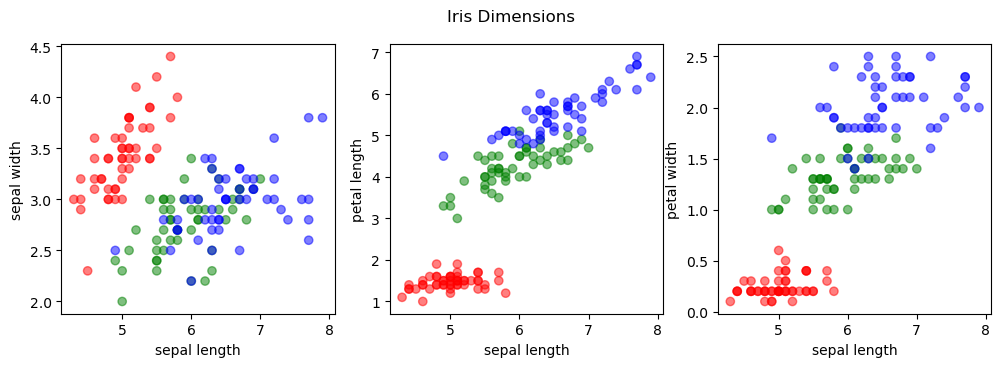

In [36]:
#autovis 1st dim against the rest
N_DIMS = X.shape[1] - 1
fig, axs = plt.subplots(1,N_DIMS, figsize=(12, 3.5))
fig.suptitle("Iris Dimensions")


for i in np.arange(N_DIMS):
    axs[i].scatter(X[X.columns[0]], X[X.columns[i+1]], c=target_c, alpha=0.5)
    axs[i].set_xlabel(X.columns[0])
    axs[i].set_ylabel(X.columns[i+1])

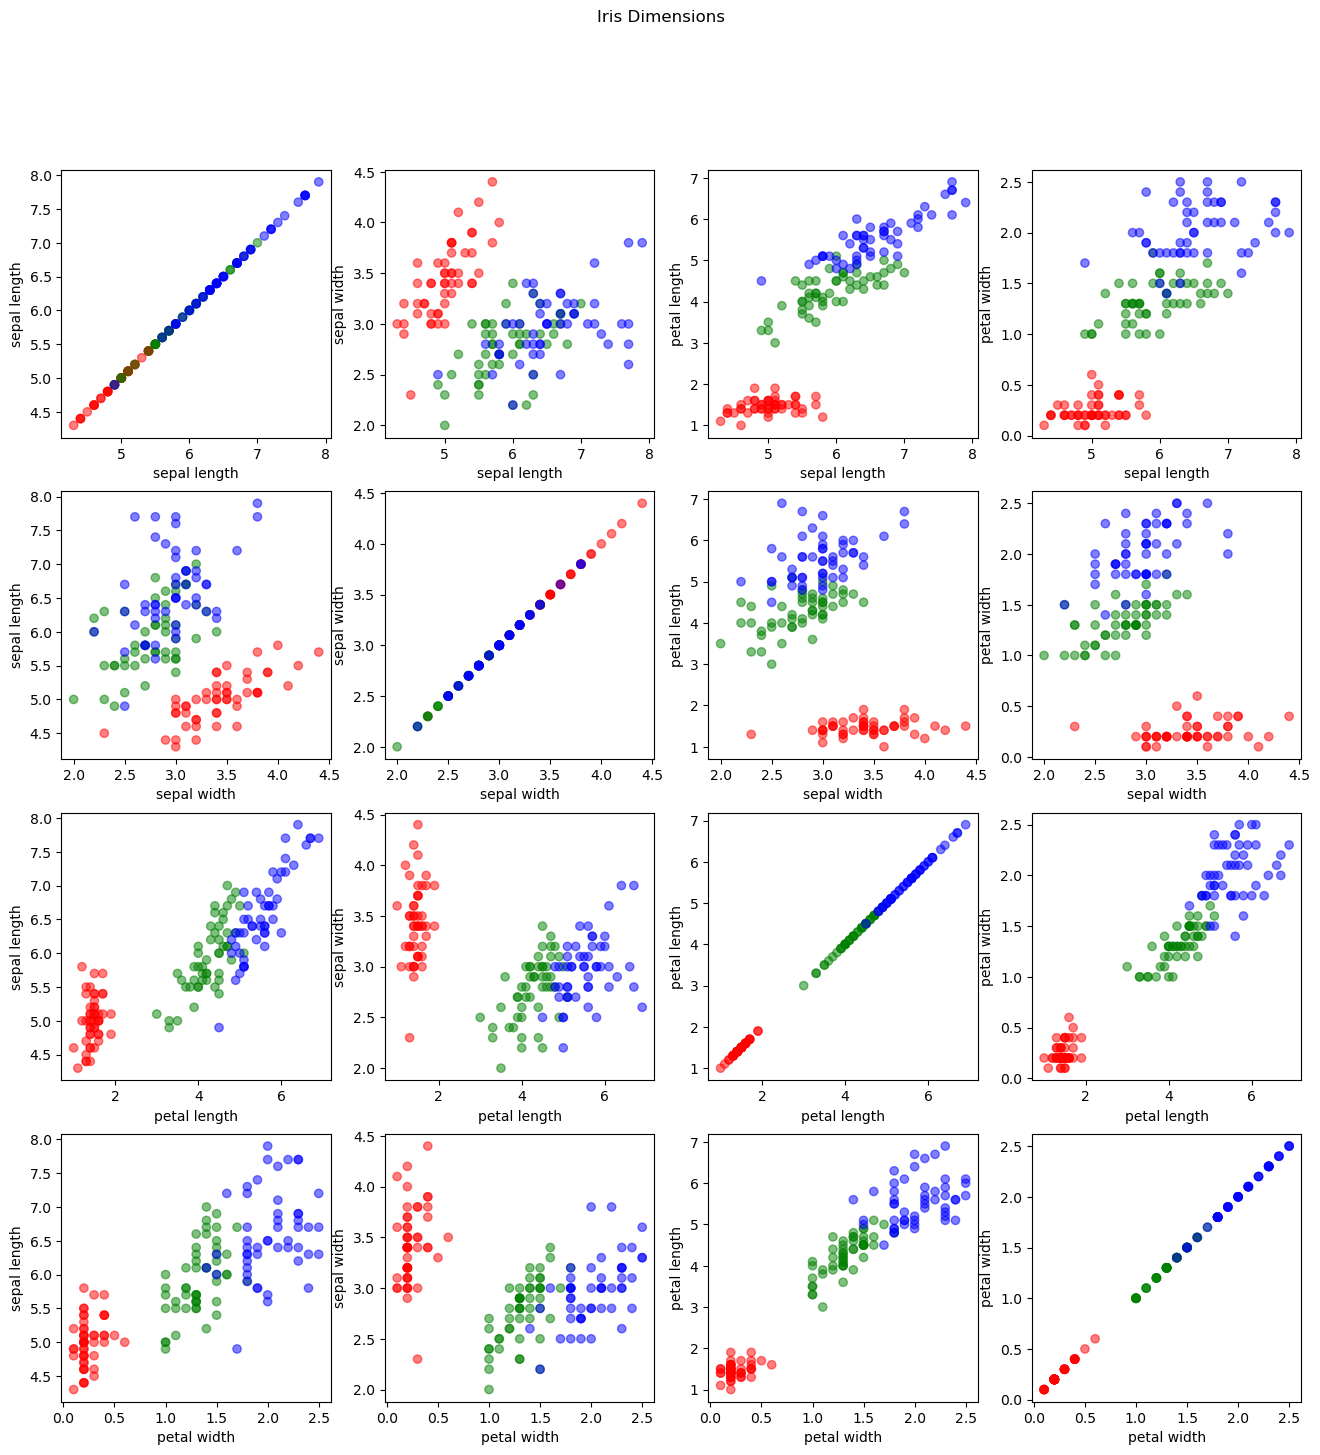

In [37]:
#autovis every dim combination 
N_DIMS = X.shape[1] 
fig, axs = plt.subplots(N_DIMS,N_DIMS, figsize=(16, 16))
fig.suptitle("Iris Dimensions")

#autovis all dims
for i in np.arange(N_DIMS):
    for j in np.arange(N_DIMS):
        axs[i,j].scatter(X[X.columns[i]], X[X.columns[j]], c=target_c, alpha=0.5 )
        axs[i,j].set_xlabel(X.columns[i])
        axs[i,j].set_ylabel(X.columns[j])

- Every Dim Combination with `matplotlib`  
skipped color dimenstion

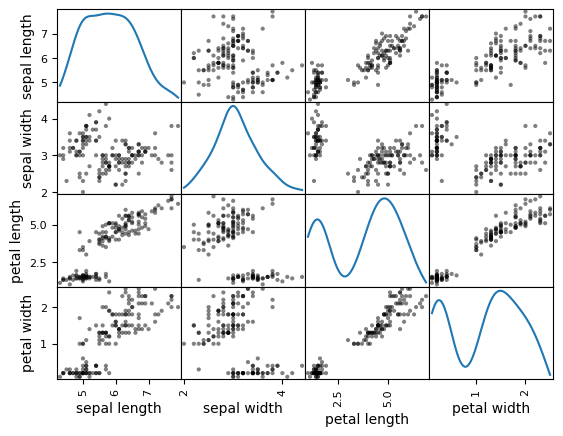

In [38]:
pd.plotting.scatter_matrix(X, diagonal='kde', color='k');

#### PracticalMath: Combinatorics
Have: Iris dataset with 4 dims    
Task: Draw correlation matrix between all 4 dims  
Q: How many dim correlations?  
Combinatorics: 
- Order? No  
- Repeting? No =>  
- use `Binomial Coefficient`  
`nCk` read as '`n choose k`'  
![Binomial Coefficient](../images/math_binomial_coefficient.png)  

A: 4C2 = 6  
Vis: ScatterMatrix confirms 6 possible correlations between all 4 dims

In [39]:
#Xtra add color: custom fn, slightly modified due to python and pandas upper versions
# class labels in Pandas scattermatrix
# Refer to https://stackoverflow.com/questions/22943894/class-labels-in-pandas-scattermatrix
def factor_scatter_matrix(df, factor, palette=None):
    '''Create a scatter matrix of the variables in df, with differently colored
    points depending on the value of df[factor].
    inputs:
        df: pandas.DataFrame containing the columns to be plotted, as well 
            as factor.
        factor: string or pandas.Series. The column indicating which group 
            each row belongs to.
        palette: A list of hex codes, at least as long as the number of groups.
            If omitted, a predefined palette will be used, but it only includes
            9 groups.
    '''
    import matplotlib.colors
    import numpy as np
    from pandas.plotting import scatter_matrix
    from scipy.stats import gaussian_kde

    #if isinstance(factor, basestring):
    if isinstance(factor, str):
        factor_name = factor #save off the name
        factor = df[factor] #extract column
        df = df.drop(factor_name,axis=1) # remove from df, so it 
        # doesn't get a row and col in the plot.

    classes = list(set(factor))

    if palette is None:
        palette = ['#e41a1c', '#377eb8', '#4eae4b', 
                   '#994fa1', '#ff8101', '#fdfc33', 
                   '#a8572c', '#f482be', '#999999']

    color_map = dict(zip(classes,palette))

    if len(classes) > len(palette):
        raise ValueError('''Too many groups for the number of colors provided.
We only have {} colors in the palette, but you have {}
groups.'''.format(len(palette), len(classes)))

    colors = factor.apply(lambda group: color_map[group])
    axarr = scatter_matrix(df,figsize=(10,10),marker='o',c=colors,diagonal=None)


    #for rc in xrange(len(df.columns)):
    for rc in np.arange(len(df.columns)):
        for group in classes:
            #y = df[factor == group].icol(rc).values #DataFrame.icol(i)[source] DEPRECATED. Use .iloc[:, i] instead
            y = df[factor == group].iloc[:, rc].values
            gkde = gaussian_kde(y)
            ind = np.linspace(y.min(), y.max(), 1000)
            axarr[rc][rc].plot(ind, gkde.evaluate(ind),c=color_map[group])

    return axarr, color_map

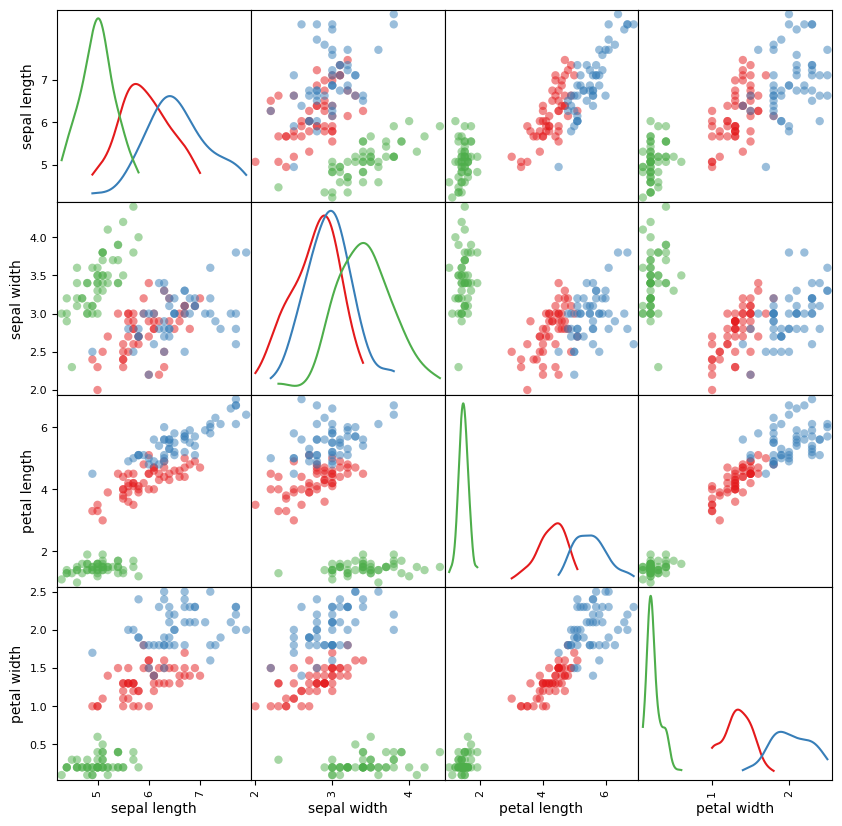

In [40]:
#axarr, color_map = factor_scatter_matrix(df_iris,'target_c') $was but now an xtra column
#axarr, color_map = factor_scatter_matrix(df_iris.iloc[:,:4],df_iris.iloc[:,5]) #if with df_iris
axarr, color_map = factor_scatter_matrix(X,target_c)
color_map;

In [41]:
#with Seaborn more flexible plots
# refer to https://seaborn.pydata.org/tutorial/axis_grids.html
# sns.pairplot(iris, hue="species", height=2.5)

### 2.2 Vis 2D Reduced

In [42]:
#Applying it to PCA function
X_2d = myPCA(X , 2)
print(X_2d.shape)
 
#Creating a Pandas DataFrame of reduced Dataset
df_X2d = pd.DataFrame(X_2d , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
df_X2d = pd.concat([df_X2d , pd.DataFrame(target_c)] , axis = 1)
df_X2d.head()

(150, 2)


,PC1,PC2,target_c
0,2.684126,0.319397,r
1,2.714142,-0.177001,r
2,2.888991,-0.144949,r
3,2.745343,-0.318299,r
4,2.728717,0.326755,r


Text(0.5, 1.0, '2D: Iris Data')

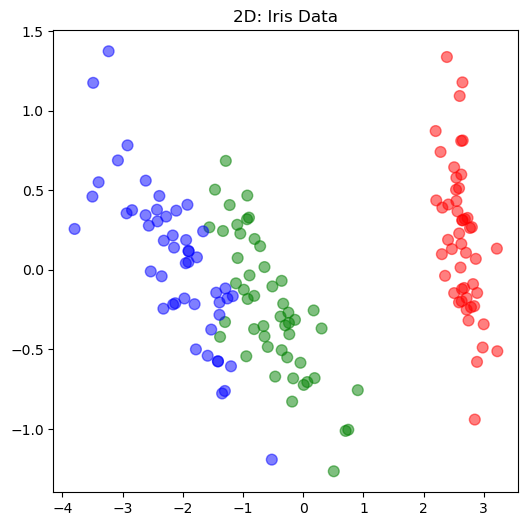

In [43]:
plt.figure(figsize = (6,6))
plt.scatter(data = df_X2d , x = 'PC1',y = 'PC2' , c = 'target_c' , s = 60, alpha=0.5 ); #, palette= 'icefire');
plt.title('2D: Iris Data')


In [44]:
#Applying it to PCA function
X_3d = myPCA(X , 3)
print(X_3d.shape)
 
#Creating a Pandas DataFrame of reduced Dataset
df_X3d = pd.DataFrame(X_3d , columns = ['PC1','PC2', 'PC3'])
 
#Concat it with target variable to create a complete Dataset
df_X3d = pd.concat([df_X3d , pd.DataFrame(target_c)] , axis = 1)
df_X3d.head()

(150, 3)


,PC1,PC2,PC3,target_c
0,2.684126,0.319397,0.027915,r
1,2.714142,-0.177001,0.210464,r
2,2.888991,-0.144949,-0.017900,r
3,2.745343,-0.318299,-0.031559,r
4,2.728717,0.326755,-0.090079,r


In [45]:
fig = px.scatter_3d(
    df_X3d, x='PC1', y='PC2', z='PC3', color=target_c, opacity=.5,
    title='3D: Iris Data', width = 800, height=800
)
fig.show()